LOADING THE DATASET

In [1]:
import pandas as pd
df=pd.read_csv('/content/imbalanced_dataset  (1) .csv')
df.head(5)

,review,rating
0,bad costly experience unfortunately boyfriend ...,1
1,more aggressive and aggervated,1
2,after latest update of app the app is not work...,1
3,it was hard to get on but i stuck with it for ...,1
4,kahala hawaiian word means overrated begin exp...,1


In [2]:
df['rating'].value_counts()

,count
rating,
5,46765
4,38971
3,31177
2,23382
1,15588


REMOVING STOPWORDS

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = word_tokenize(str(text))  # tokenize text
    filtered = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered)
df['review']=df['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [4]:
stop_words = set(stopwords.words('english'))
print("Total stopwords:", len(stop_words))
print(sorted(stop_words))  # Sorted alphabetically

Total stopwords: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', '

SAMPLE REVIEWS

In [5]:
n = 8

# Loop through ratings from 1 to 5
for rating in range(1, 6):
    # Filter reviews of the current rating
    filtered_reviews = df[df['rating'] == rating]['review'].dropna()

    # Sample 'n' reviews or all if fewer
    sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=rating)
    print(f"\nShowing {min(n, len(filtered_reviews))} sample review(s) for Rating {rating}:\n")
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review.strip()}\n")


Showing 8 sample review(s) for Rating 1:

1. cant even login without chrome installed

2. even paying monthly subscription chatgpt plus havent started support reach kindly check revert

3. extreme usless app

4. headachessweatinglose appetitelack sleep

5. truly awful admit slightly sceptical arriving hotel city centre old took attempts room smoking booking specified nonsmoking ca nt guarantee non smoking room need medical certificate lot good telling room stuff therethe hotel woken thought nt sure leaving case belongings therevery poor tired run rude staff hey charge room nightavoid costs complete rip

6. cesspool carribean booked trip apple vacations nt recommend travel advice resort construction going right resort building service desk waiters horrible supposed working food bland disgusting residents including wife ill eating food resort purposely overbooked given room purchased room rented supposed building paid order room paid pay extra beach beautiful ample sun

7. beware really

LEMMATIZATION

In [6]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)
df['review']=df['review'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


SAMPLE REVIEWS

In [7]:
n = 8

# Loop through ratings from 1 to 5
for rating in range(1, 6):
    # Filter reviews of the current rating
    filtered_reviews = df[df['rating'] == rating]['review'].dropna()

    # Sample 'n' reviews or all if fewer
    sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=rating)

    # Print the results
    print(f"\nShowing {min(n, len(filtered_reviews))} sample review(s) for Rating {rating}:\n")
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review.strip()}\n")


Showing 8 sample review(s) for Rating 1:

1. cant even login without chrome installed

2. even paying monthly subscription chatgpt plus havent started support reach kindly check revert

3. extreme usless app

4. headachessweatinglose appetitelack sleep

5. truly awful admit slightly sceptical arriving hotel city centre old took attempt room smoking booking specified nonsmoking ca nt guarantee non smoking room need medical certificate lot good telling room stuff therethe hotel woken thought nt sure leaving case belonging therevery poor tired run rude staff hey charge room nightavoid cost complete rip

6. cesspool carribean booked trip apple vacation nt recommend travel advice resort construction going right resort building service desk waiter horrible supposed working food bland disgusting resident including wife ill eating food resort purposely overbooked given room purchased room rented supposed building paid order room paid pay extra beach beautiful ample sun

7. beware really wish 

In [8]:
short_counts = df[df['review'].apply(lambda x: len(str(x).split()) < 3)] \
                .groupby('rating').size().reset_index(name='count_less_than_3_words')

print(short_counts)
long_counts = df[df['review'].apply(lambda x: len(str(x).split()) > 50)] \
               .groupby('rating').size().reset_index(name='count_long_reviews')

print(long_counts)

   rating  count_less_than_3_words
0       1                     1842
1       2                     1709
2       3                     3117
3       4                     3858
4       5                     8547
   rating  count_long_reviews
0       1                2677
1       2                6026
2       3                6842
3       4                8705
4       5                4461


TRAIN_TEST_SPLIT

In [9]:
from sklearn.model_selection import train_test_split

# Suppose 'df' has columns: 'review' and 'rating'

# Features (X) and labels (y)
X = df['review']
y = df['rating']

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Optionally combine X and y back into DataFrames
train_df = pd.DataFrame({'review': X_train, 'rating': y_train})
test_df = pd.DataFrame({'review': X_test, 'rating': y_test})

TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer#tf=term frequency=1  how many times-idf=inverse document

vectorizer = TfidfVectorizer(max_features=5000) # Removed stop_words='english' as stopwords were already removed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

LOGISTIC REGRESSION

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5296532700388107

Classification Report:
               precision    recall  f1-score   support

           1       0.42      0.59      0.49      3118
           2       0.48      0.52      0.50      4676
           3       0.48      0.42      0.45      6236
           4       0.51      0.41      0.45      7794
           5       0.65      0.69      0.67      9353

    accuracy                           0.53     31177
   macro avg       0.51      0.52      0.51     31177
weighted avg       0.53      0.53      0.53     31177



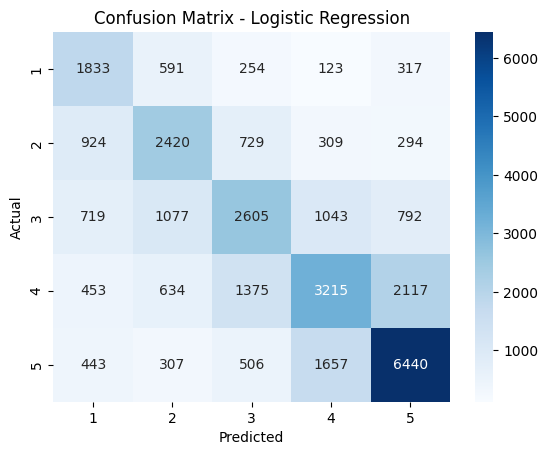

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Re-apply TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression
log_model = LogisticRegression(
    C=1.0,
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs',
    multi_class='auto'
)
log_model.fit(X_train_tfidf, y_train)


# Predictions & Evaluation
y_pred = log_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

SUPPORT VECTOR MACHINE

Accuracy: 0.5347852583635372

Classification Report:
               precision    recall  f1-score   support

           1       0.44      0.55      0.49      3118
           2       0.49      0.53      0.51      4676
           3       0.48      0.42      0.45      6236
           4       0.52      0.39      0.44      7794
           5       0.62      0.73      0.67      9353

    accuracy                           0.53     31177
   macro avg       0.51      0.52      0.51     31177
weighted avg       0.53      0.53      0.53     31177



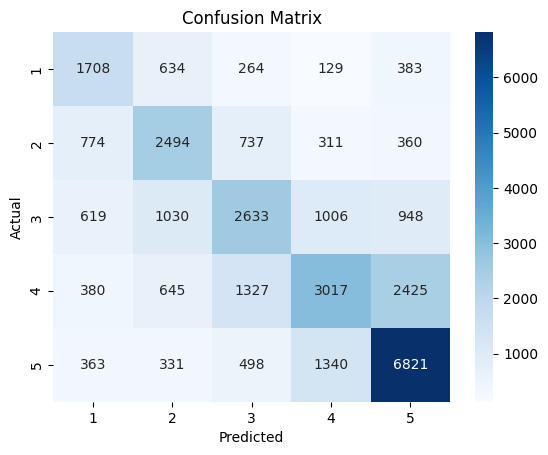

In [12]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM

model = LinearSVC(C=1.0, class_weight='balanced', random_state=42)
model.fit(X_train_tfidf, y_train)


# Predictions & Evaluation

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

HYPERPARAMETER TUNING

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Best Parameters: {'C': 10, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'saga'}

✅ Accuracy: 0.5362286300798665

📄 Classification Report:
               precision    recall  f1-score   support

           1       0.44      0.60      0.51      3118
           2       0.50      0.55      0.53      4676
           3       0.48      0.44      0.46      6236
           4       0.51      0.41      0.45      7794
           5       0.64      0.68      0.66      9353

    accuracy                           0.54     31177
   macro avg       0.52      0.53      0.52     31177
weighted avg       0.54      0.54      0.53     31177



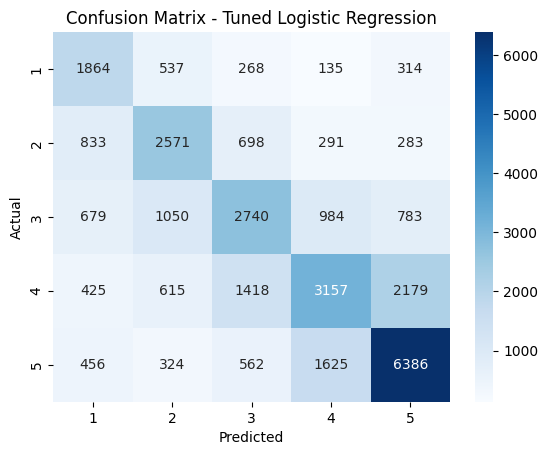

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],               # Regularization strength
    'solver': ['lbfgs', 'saga'],           # Solvers that support L2 and multiclass
    'penalty': ['l2'],                     # L2 penalty (used with lbfgs/saga)
    'multi_class': ['auto']                # Let sklearn choose
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',    # Macro F1 handles imbalance better than accuracy
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train_tfidf, y_train)

# Best model and parameters
print("✅ Best Parameters:", grid_search.best_params_)
best_log_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_log_model.predict(X_test_tfidf)

# Evaluation
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.show()


BALANCED MODEL B...BALANCED

In [14]:
 import joblib

In [15]:
joblib.dump(log_model,'model A.pkl')

['model A.pkl']

In [16]:
joblib.dump(vectorizer,'vectorizer.pkl')


['vectorizer.pkl']

Accuracy: 0.4346794111043397

Classification Report:
               precision    recall  f1-score   support

           1       0.31      0.54      0.39      3118
           2       0.35      0.39      0.37      4676
           3       0.35      0.30      0.33      6236
           4       0.42      0.33      0.37      7794
           5       0.62      0.60      0.61      9353

    accuracy                           0.43     31177
   macro avg       0.41      0.43      0.41     31177
weighted avg       0.44      0.43      0.43     31177



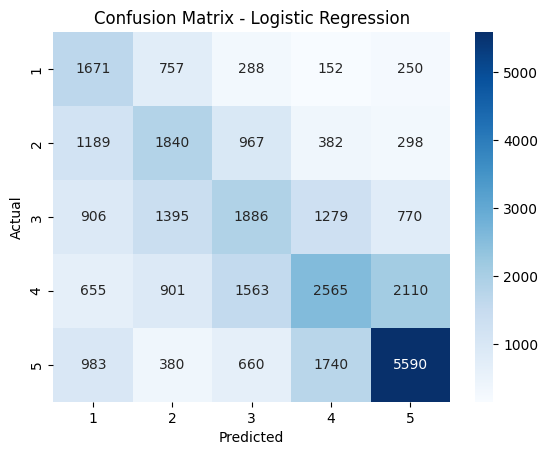

In [18]:
cross_test=joblib.load('model B (1).pkl') # Load the model trained with 5000 features
vectorizer=joblib.load('vectorizer2 (1).pkl') # Load the vectorizer trained with 5000 features
X_test_tfidf = vectorizer.transform(X_test) # Transform X_test using the loaded vectorizer
y_pred = cross_test.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [19]:
df.to_csv('IMBALANCED_TRAIN_TEST.csv',index=False)